# Coincidence in ${}^{60}$Co data
Author:

J. Angevaare // <j.angevaare@nikhef.nl> // 2020-05-25

Below we:
 - read a file of ${}^{60}$Co-data
 - Make a plot of the coincidence spectra

## Open the data
Same as in previous tutorial, nothing new here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numba

In [2]:
# Let's look at the first root file in the list above
path = '../data/Co60_sample.csv'

In [3]:
co60 = pd.read_csv(path)

In [4]:
co60

,channel,integral,time
0,5,1258.48970,3.787286e+09
1,4,1328.03430,3.787286e+09
2,4,1211.03720,3.787286e+09
3,4,893.12225,3.787286e+09
4,5,241.21430,3.787286e+09
...,...,...,...
99995,4,1379.15210,3.787287e+09
99996,5,777.09750,3.787287e+09
99997,4,1734.06140,3.787287e+09
99998,4,1367.85340,3.787287e+09


# Coincidence

In [5]:
# Let's do a quick energy cut to get rid of events outside the [0 keV, 3000 keV] interval
co60 = co60[
    (co60['integral'] > 0) & 
    (co60['integral'] < 3000)
]
co60

,channel,integral,time
0,5,1258.48970,3.787286e+09
1,4,1328.03430,3.787286e+09
2,4,1211.03720,3.787286e+09
3,4,893.12225,3.787286e+09
4,5,241.21430,3.787286e+09
...,...,...,...
99995,4,1379.15210,3.787287e+09
99996,5,777.09750,3.787287e+09
99997,4,1734.06140,3.787287e+09
99998,4,1367.85340,3.787287e+09


# The coincidence matching. 
Below we will use a function called `easy_coincidence_matching`. This allows us to quickly match data from a given channel to data in another channel if it is withing a small time window. 

In [6]:
from coincidence_matching import *

In [7]:
# The first time running the command below this it may take a while, the second time will be MUCH faster!
# the %%time on top monitors how long it takes to execute this cell

In [7]:
%%time
matched_co60 = easy_coincidence_matching(co60, check_time_order = False)

Wall time: 2.42 s


In [9]:
# See below, it'll be much better

In [8]:
%%time
matched_co60 = easy_coincidence_matching(co60, check_time_order = False)

Wall time: 65.8 ms


In [9]:
# Let's have a look at what this data looks like
matched_co60

,e_ch4,e_ch5,t_ch4,t_ch5
0,893.12225,241.21430,3.787286e+09,3.787286e+09
1,423.31165,890.62010,3.787286e+09,3.787286e+09
2,1221.42480,421.89755,3.787286e+09,3.787286e+09
3,997.63600,1112.39590,3.787286e+09,3.787286e+09
4,1330.85890,457.94452,3.787286e+09,3.787286e+09
...,...,...,...,...
10728,1455.23670,1068.05190,3.787287e+09,3.787287e+09
10729,1314.91310,592.48990,3.787287e+09,3.787287e+09
10730,991.43990,264.75974,3.787287e+09,3.787287e+09
10731,1391.36200,1184.32150,3.787287e+09,3.787287e+09


# Coincidence plot
Below we'll plot the results we have just gotten, can you explain all the lines in there? Elaborate on what each of the following lines indicate:
  - cyan
  - lightgreen
  - green
  - red
  - blue

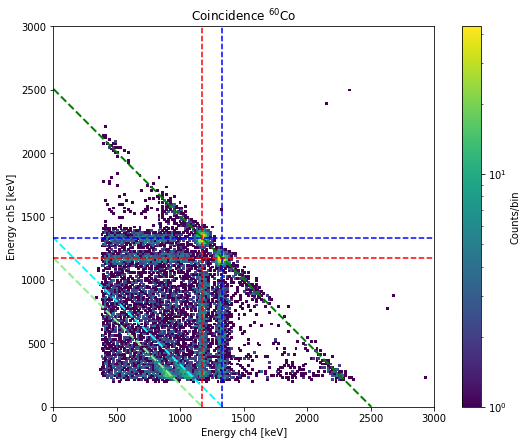

In [10]:
plt.figure(figsize=(10,7))
plt.hist2d(
    matched_co60['e_ch4'],
    matched_co60['e_ch5'], 
    bins = 200, 
    norm=LogNorm(),
    range=[[0,3000],[0,3000]]);
plt.plot([1332.5,0], [0,1332.5], linestyle = '--', linewidth = 2, c = 'cyan')
plt.plot([0,1173.2], [1173.2,0], linestyle = '--', linewidth = 2, c = 'lightgreen')
plt.plot([0,1173.2+1332.5], [1173.2+1332.5,0], linestyle = '--', linewidth = 2, c = 'green')
plt.gca().set_aspect(1)
plt.colorbar(label='Counts/bin')
plt.xlabel('Energy ch4 [keV]')
plt.ylabel('Energy ch5 [keV]')
plt.title('Coincidence ${}^{60}$Co');
plt.axvline(1173.2, c = 'r', linestyle = '--')
plt.axhline(1173.2, c = 'r', linestyle = '--')
plt.axvline(1332.5, c = 'b', linestyle = '--')
plt.axhline(1332.5, c = 'b', linestyle = '--')

# Plot the spectra of other channel for one of the photopeaks

But we can do more fun stuff! What if we select the peaks that are around 1173.2 keV and check what we will see in the other peak. 

In [11]:
selected_data = select_peak(matched_co60, 'e_ch4', energy = 1332.5, energy_range = 75)

In [12]:
selected_data

,e_ch4,e_ch5,t_ch4,t_ch5
4,1330.8589,457.94452,3.787286e+09,3.787286e+09
7,1348.6272,622.81870,3.787286e+09,3.787286e+09
14,1332.1346,1125.62610,3.787286e+09,3.787286e+09
15,1360.8372,262.18094,3.787286e+09,3.787286e+09
18,1283.1124,612.27930,3.787286e+09,3.787286e+09
...,...,...,...,...
10698,1374.5050,769.69745,3.787287e+09,3.787287e+09
10699,1309.5371,244.40974,3.787287e+09,3.787287e+09
10714,1348.3539,1200.18680,3.787287e+09,3.787287e+09
10729,1314.9131,592.48990,3.787287e+09,3.787287e+09


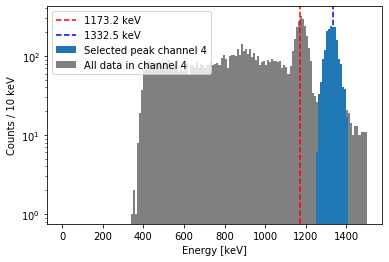

In [13]:
plt.hist(selected_data['e_ch4'], bins = 150, range=[0,1500], label = 'Selected peak channel 4', zorder =10)
plt.hist(matched_co60['e_ch4'], bins = 150, range=[0,1500], label = 'All data in channel 4', color = 'grey')
plt.axvline(1173.2, c = 'r', linestyle = '--', label = '1173.2 keV')
plt.axvline(1332.5, c = 'b', linestyle = '--', label = '1332.5 keV')
plt.yscale('log')
plt.legend()
plt.xlabel('Energy [keV]')
plt.ylabel('Counts / 10 keV');

Great, so in the plot above we select the blue peaks out of the grey spectrum. Great! But, what happens in the other channel if we have any of the events from the blue part of the spectrum above?

Below we'll find out! Can you explain what we see happening in the spectrum below?

Text(0, 0.5, 'Counts / 10 keV')

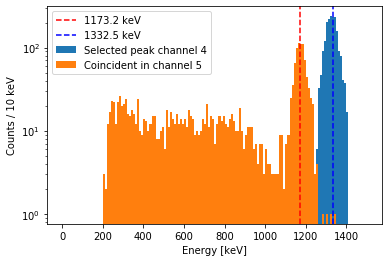

In [14]:
plt.hist(selected_data['e_ch4'], bins = 150, range=[0,1500], label = 'Selected peak channel 4')
plt.hist(selected_data['e_ch5'], bins = 150, range=[0,1500], label = 'Coincident in channel 5')
plt.axvline(1173.2, c = 'r', linestyle = '--', label = '1173.2 keV')
plt.axvline(1332.5, c = 'b', linestyle = '--', label = '1332.5 keV')
plt.yscale('log')
plt.legend()
plt.xlabel('Energy [keV]')
plt.ylabel('Counts / 10 keV')

So now you can have a look at the spectra below. Here we do the same trick, we select events with a certain energy and check what happens in the other detector during those events. But this time it may be somewhat harder to see what is going on. Can you explain?

Text(0, 0.5, 'Counts / 10 keV')

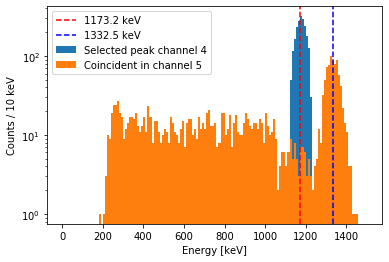

In [15]:
selected_data = select_peak(matched_co60, 'e_ch4', energy = 1173.2, energy_range = 50)
plt.hist(selected_data['e_ch4'], bins = 150, range=[0,1500], label = 'Selected peak channel 4')
plt.hist(selected_data['e_ch5'], bins = 150, range=[0,1500], label = 'Coincident in channel 5')
plt.axvline(1173.2, c = 'r', linestyle = '--', label = '1173.2 keV')
plt.axvline(1332.5, c = 'b', linestyle = '--', label = '1332.5 keV')
plt.yscale('log')
plt.legend()
plt.xlabel('Energy [keV]')
plt.ylabel('Counts / 10 keV')